# House Prices: Advanced Regression Techniques

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [2]:
df_train = pd.read_csv('C:/Users/Administrator/Documents/Datasets/Kaggle competitions/house-prices-prediction/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

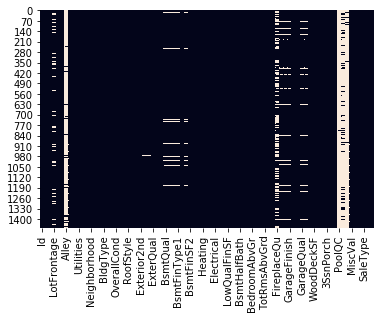

In [4]:
sns.heatmap(df_train.isnull(),cbar=False)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df_train.drop(['Id','Alley','PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True) # Removing features which have most of the null value.

In [7]:
df_train.shape

(1460, 75)

In [8]:
df_train.isnull().sum() # before replacing missing values

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
                ... 
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [9]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])
#df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

In [10]:
df_train.isnull().sum() # after replacing null values

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

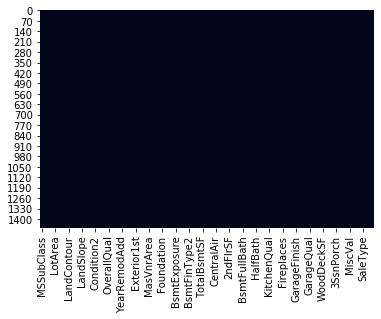

In [11]:
sns.heatmap(df_train.isnull(),cbar=False)

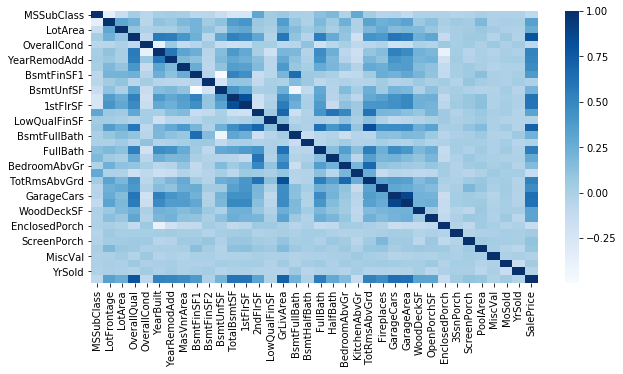

In [12]:
# Heatmap of correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), cmap='Blues')
plt.show()

In [13]:
df_train.dropna(inplace=True)

In [14]:
df_train.shape

(1459, 75)

In [15]:
df_train.drop(['GarageCars','TotalBsmtSF'],axis=1,inplace=True)

In [16]:
df_train[df_train.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [17]:
df_train_1 = df_train

In [18]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

len(columns)

39

In [19]:
def cat_to_onehot(columns,df):
    df_final=df
    i=0
    for index,col in enumerate(columns):
        
        #print(col)
        df1=pd.get_dummies(df[col],drop_first=True)
        
        df.drop([col],axis=1,inplace=True)
        if index==0:
            df_final=df1.copy()
        else: 
            df_final=pd.concat([df_final,df1],axis=1)
        #i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [20]:
df_test = pd.read_csv('C:/Users/Administrator/Documents/Datasets/Kaggle competitions/house-prices-prediction/modified_test.csv')

df_test.shape

(1459, 72)

In [21]:
final_df=pd.concat([df_train,df_test],axis=0)

In [22]:
df=cat_to_onehot(columns,final_df)

In [23]:
df.shape

(2918, 234)

In [24]:
df =df.loc[:,~df.columns.duplicated()]

In [25]:
df.shape

(2918, 174)

In [26]:
train=df.iloc[:1458,:]
test=df.iloc[1459:,:]

In [28]:
y_train=train['SalePrice']
X_train=train.drop(['SalePrice'],axis=1)

In [29]:
test=test.drop(['SalePrice'],axis=1)

In [30]:
X_train.shape,y_train.shape

((1458, 173), (1458,))

In [31]:
def xgb_Regressor(train_x,train_y):
    
    # k = KFold(n_splits=3, random_state=0)
    
    #param_grid = {'max_depth' : [1,2,3,4],'n_estimators':[70,180,350,750]}
    parameters = {'nthread':[2], #when use hyperthread, xgboost may become slower
              #'objective':['reg:linear'],
              'learning_rate': [0.05,0.125,0.153], #so called `eta` value
              'max_depth': [3,5, 6, 7],
              'min_child_weight': [3,4],
              'subsample': [0.5,0.6,0.7],
              'colsample_bytree': [0.5,0.7,0.9],
              'n_estimators': [100,220,500,750,925]}
    
    clf = xgb.XGBRegressor()
    rdm_clf = RandomizedSearchCV(clf,parameters,scoring='neg_mean_absolute_error',cv=3,verbose = 0)
    rdm_clf.fit(train_x,train_y)
    
    return rdm_clf.best_params_


In [32]:
%%time
rdm_clf_params = xgb_Regressor(X_train,y_train)

[13:21:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:00] WARNI

In [33]:
rdm_clf_params

{'subsample': 0.7,
 'nthread': 2,
 'n_estimators': 925,
 'min_child_weight': 4,
 'max_depth': 3,
 'learning_rate': 0.05,
 'colsample_bytree': 0.9}

In [34]:
clf = xgb.XGBRegressor(nthread= 2,subsample= 0.7,n_estimators= 925,min_child_weight= 4,max_depth= 3,learning_rate=0.05,colsample_bytree= 0.9)
clf.fit(X_train,y_train)

[13:24:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=925,
             n_jobs=1, nthread=2, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [35]:
y_pred=clf.predict(test)

In [36]:
y_pred

array([132207.05 , 155264.86 , 181278.7  , ..., 181418.89 , 121584.234,
       228548.16 ], dtype=float32)

In [37]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('C:/Users/Administrator/Documents/Datasets/Kaggle competitions/house-prices-prediction/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('C:/Users/Administrator/Documents/Datasets/Kaggle competitions/house-prices-prediction/sample_submission.csv',index=False)